In [1]:
import logging
from graph_analysis.spectral import SpectralAnalyzer
from scipy import sparse
import numpy as np
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from bluepysnap import Circuit

In [2]:
# Create a random graph
# A = np.random.randint(0, 2, size=(100, 100))
# A = np.triu(A, 1)
# A = A + A.T
# A = csr_matrix(A)

logging.info('Loading circuit')

CIRCUIT_DIR = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/'
c = Circuit(f'{CIRCUIT_DIR}/sonata/circuit_config.json')
nodes = c.nodes['hippocampus_neurons']
target = 'slice20'
target_indices = nodes.ids(target)
target_mtypes = nodes.get(target).mtype.values
target_mtype_dict = {i:value for i,value in enumerate(target_mtypes)}

# subsample_surround = False
# surround_indices = nodes.ids('surround')

adj_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_synaptome.npz'
adj = sparse.load_npz(adj_path)
adj_target = adj[target_indices,:]
adj_target = adj_target[:,target_indices]


#normalize adjacency matrix
# adj_target = adj_target / adj_target.max()

# # Analyze the graph
# analyzer = SpectralAnalyzer(adj_target)
# # analyzer.visualize_graph([1, 2])

# eigs = analyzer.get_eigenvalues()

# output_dir = '../output/spectral_analysis_test/'
# os.makedirs(output_dir, exist_ok=True)

# analyzer.visualize_graph([1,2])
# plt.savefig(f'{output_dir}/spectral_clustering.png')

# analyzer.visualize_graph([1,2,3])
# plt.savefig(f'{output_dir}/spectral_clustering3D.png')



# Create a random graph
# G = nx.erdos_renyi_graph(n=200, p=0.1, seed=0)
G = nx.from_scipy_sparse_array(adj_target)
nx.set_node_attributes(G, target_mtype_dict, "mtype")

# Generate node positions for visualization
pos = nx.spring_layout(G, seed=0)

# Convert the graph to an adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)

# Perform spectral clustering
sc = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0)
labels = sc.fit_predict(adjacency_matrix)

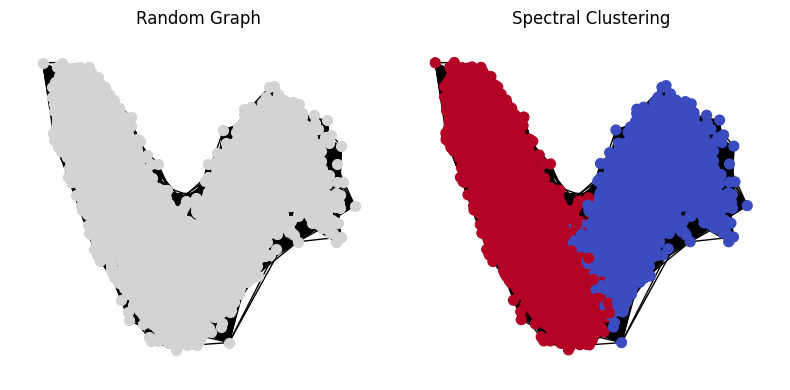

In [3]:
# Visualize the graph and the clusters
plt.figure(figsize=(8, 4))
plt.subplot(121)
nx.draw(G, pos, node_color='lightgray', node_size=50)
plt.title('Random Graph')
plt.subplot(122)
nx.draw(G, pos, node_color=labels, cmap='coolwarm', node_size=50)
plt.title('Spectral Clustering')
plt.tight_layout()
plt.show()


In [6]:
color_map = {
    'SLM_PPA': 'red',
    'SO_BP': 'blue',
    'SO_BS': 'green',
    'SO_OLM': 'orange',
    'SO_Tri': 'purple',
    'SP_AA': 'cyan',
    'SP_BS': 'magenta',
    'SP_CCKBC': 'yellow',
    'SP_Ivy': 'brown',
    'SP_PC': 'lime',
    'SP_PVBC': 'pink',
    'SR_SCA': 'gray'
}

In [8]:
node_attributes = nx.get_node_attributes(G, 'mtype')

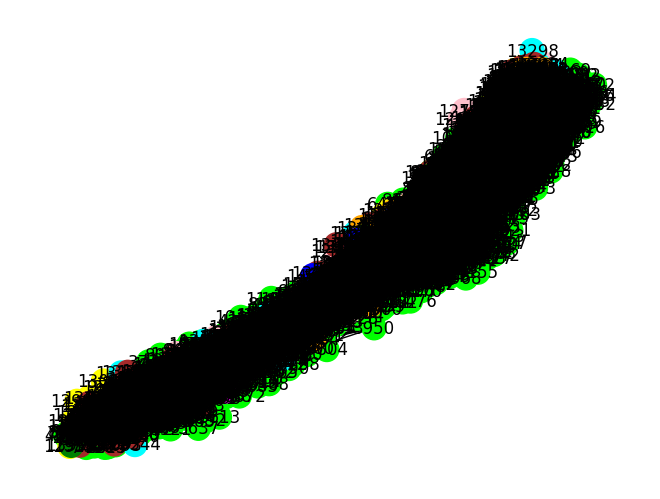

In [9]:
# Assign colors to nodes based on their attributes
node_colors = [color_map[node_attributes[node]] for node in G.nodes]

# Draw the graph with node colors
nx.draw(G, pos, node_color=node_colors, with_labels=True)

# Show the plot
plt.show()

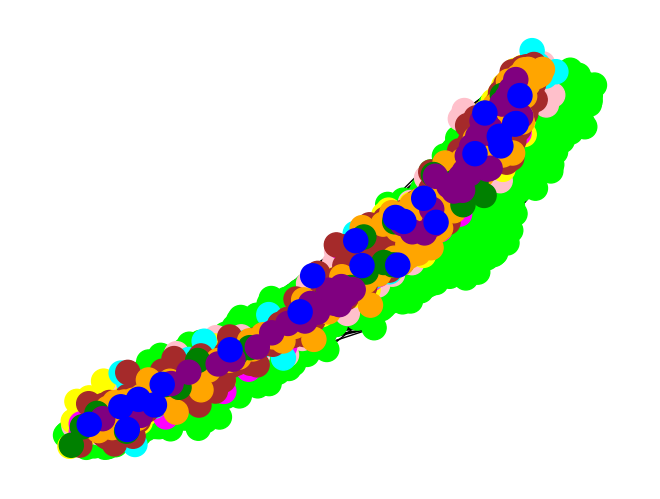

In [10]:
nx.draw(G, pos, node_color=node_colors, with_labels=False)

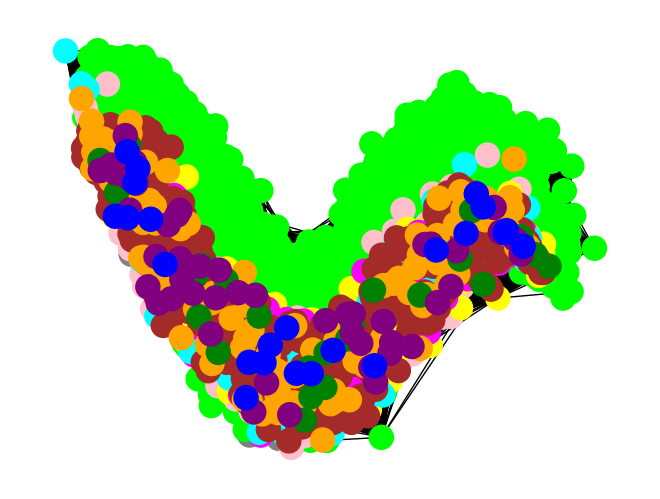

In [11]:
pos = nx.spring_layout(G, seed=0)
nx.draw(G, pos, node_color=node_colors, with_labels=False)